# Mean-variance portfolio selection

### Import libraries

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(978351)

### Generate random data for 10 stocks

In [4]:
# Random data for 10 stocks
n = 10
Q = np.random.random((n,n))
Q = np.dot(Q,Q.T)/1000
# Q
mu = np.random.rand(n) / 100
# mu

### Step 1 - compute minimum variance portfolio

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{w} & w^TQw \\
{\rm s.t.} & \sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}

In [5]:
w1 = cp.Variable(n)
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)),
                 [sum(w1) == 1,
                  w1 >= 0])
prob1.solve(verbose=True)

# Print results
print("\nSolution status: ", prob1.status)
print("Solution optimal value: ", prob1.value)
print("Solution w: ")
print(w1.value)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 26 07:00:08 PM: Your problem has 10 variables, 2 constraints, and 0 parameters.
(CVXPY) May 26 07:00:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 26 07:00:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 26 07:00:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 26 07:00:09 PM: Compiling problem (target solver=GUROBI).
(CVXPY) May 26 07:00:09 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffi

In [6]:
# Check constraint
np.allclose(np.sum(w1.value),1)

True

In [7]:
w_minVar = w1.value
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar))
ret_minVar = np.dot(mu, w_minVar)
print("Minimum variance portfolio:\n")
print("   Solution status =", prob1.status)
print("    Solution value =", prob1.value)
print("          Variance =", var_minVar)
print("   Expected return =", ret_minVar)
print("Standard deviation =", np.sqrt(var_minVar))

Minimum variance portfolio:

   Solution status = optimal
    Solution value = 0.001899092892640435
          Variance = 0.001899092892640435
   Expected return = 0.00326747985972309
Standard deviation = 0.04357858295815084


### Step 2 - compute maximum return portfolio

\begin{equation}
\begin{array}{rl}
\displaystyle \max_{w} & \mu^Tw \\
{\rm s.t.} & \sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}

In [8]:
w2 = cp.Variable(n)
prob2 = cp.Problem(cp.Maximize(mu.T@w2),
                 [sum(w2) == 1,
                  w2 >= 0])
prob2.solve(verbose=True)

# Print results
print("\nSolution status: ", prob2.status)
print("Solution optimal value: ", prob2.value)
print("Solution w: ")
print(w2.value)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 26 07:00:12 PM: Your problem has 10 variables, 2 constraints, and 0 parameters.
(CVXPY) May 26 07:00:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 26 07:00:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 26 07:00:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 26 07:00:12 PM: Compiling problem (target solver=ECOS).
(CVXPY) May 26 07:00:12 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Cone

In [9]:
w_maxRet = w2.value
var_maxRet = np.dot(w_maxRet, np.dot(Q, w_maxRet))
ret_maxRet = np.dot(mu, w_maxRet)
print("Maximum return portfolio:\n")
print("   Solution status =", prob2.status)
print("    Solution value =", prob2.value)
print("   Expected return =", ret_maxRet)
print("          Variance =", var_maxRet)
print("Standard deviation =", np.sqrt(var_maxRet))

Maximum return portfolio:

   Solution status = optimal
    Solution value = 0.008934923691822914
   Expected return = 0.008934923691822914
          Variance = 0.00445041516526107
Standard deviation = 0.06671143204324931


### Step 3 - compute mean-variance efficient frontier

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{w} & w^TQw \\
{\rm s.t.} & \mu^Tw \geq \varepsilon \\
&\sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}
\begin{equation}
\varepsilon \in [\varepsilon_{R_{\rm minVar}},\varepsilon_{R_{\rm maxRet}}]
\end{equation}

In [10]:
# Target returns
targetRet = np.linspace(ret_minVar,ret_maxRet,50)
targetRet

array([0.00326748, 0.00338314, 0.0034988 , 0.00361447, 0.00373013,
       0.00384579, 0.00396145, 0.00407711, 0.00419278, 0.00430844,
       0.0044241 , 0.00453976, 0.00465543, 0.00477109, 0.00488675,
       0.00500241, 0.00511807, 0.00523374, 0.0053494 , 0.00546506,
       0.00558072, 0.00569638, 0.00581205, 0.00592771, 0.00604337,
       0.00615903, 0.00627469, 0.00639036, 0.00650602, 0.00662168,
       0.00673734, 0.00685301, 0.00696867, 0.00708433, 0.00719999,
       0.00731565, 0.00743132, 0.00754698, 0.00766264, 0.0077783 ,
       0.00789396, 0.00800963, 0.00812529, 0.00824095, 0.00835661,
       0.00847228, 0.00858794, 0.0087036 , 0.00881926, 0.00893492])

In [11]:
# Define optimization problem and compute one portfolio on efficient frontier
w = cp.Variable(n)
eps = cp.Parameter()
eps.value = targetRet[0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)),
                 [mu.T@w >= eps,
                  sum(w) == 1,
                  w >= 0])
prob3.solve(verbose=False)

# Print results
print("\nSolution status: ", prob3.status)
print("Solution optimal value: ", prob3.value)
print("Solution w: ")
print(w.value)


Solution status:  optimal
Solution optimal value:  0.0018990938491357612
Solution w: 
[1.18406417e-07 4.02103659e-01 2.12077452e-01 5.83792955e-08
 2.31198757e-08 1.36713408e-08 1.24047926e-08 3.85818580e-01
 4.75745086e-08 3.59451255e-08]


In [12]:
# Compute efficient frontier
w_front = []
var_front = []
ret_front = []
for epsilon in targetRet:
    eps.value = epsilon
    prob3.solve(verbose=False)
    w_front.append(w.value)
    var_front.append(np.dot(w.value, np.dot(Q, w.value)))
    ret_front.append(np.dot(mu, w.value))

Plot efficient frontier

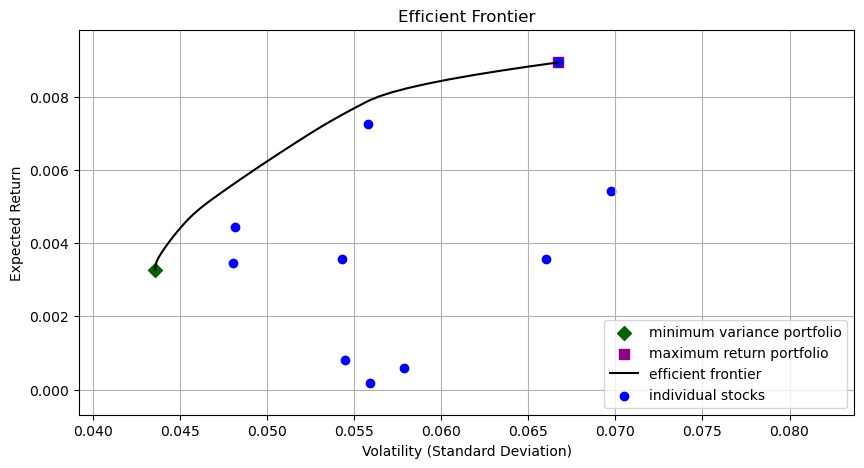

In [13]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.gca()
    
# Plot volatility versus expected return for minimum variance portfolio
ax.scatter(x=np.sqrt(var_minVar), y=ret_minVar, marker='D', s=50,  color='DarkGreen', label='minimum variance portfolio')

# Plot volatility versus expected return for maximum return portfolio
ax.scatter(x=np.sqrt(var_maxRet), y=ret_maxRet,  marker='s', s=50, color='DarkMagenta', label='maximum return portfolio')

# Plot efficient frontier
ax.plot(np.sqrt(var_front), ret_front, 'k-', label='efficient frontier')

# Plot volatility versus expected return for individual stocks
ax.scatter(x=np.sqrt(np.diag(Q)), y=mu, color='Blue', label='individual stocks')

# Format and display the final plot
ax.axis([0.9*np.sqrt(var_minVar), 1.2*np.max(np.sqrt(np.diag(Q))), np.min(mu)-0.1*(np.max(mu)-np.min(mu)), 1.1*ret_maxRet])
ax.set_xlabel('Volatility (Standard Deviation)')
ax.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
ax.legend(loc="lower right")
ax.grid()
plt.show()